## About Dataset
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

In [1]:
import sys
print(sys.executable)

d:\Programming Practice\Applied Data Science\project-HumanActivityRecognition\human\Scripts\python.exe


In [2]:
# importing library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
print(f"Training: {train['subject'].unique()}")
print('-'*70)
print(f"Testing: {test['subject'].unique()}")

Training: [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
----------------------------------------------------------------------
Testing: [ 2  4  9 10 12 13 18 20 24]


Dataset is divided into training and testing with respect to the subject. As you see above, 21 subjects are part of training dataset and 9 are part of testing dataset.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
# checking for duplicate in a data
print(f"Number of duplicate in train: {sum(train.duplicated())}")
print(f"Number of duplicate in test: {sum(test.duplicated())}")

Number of duplicate in train: 0
Number of duplicate in test: 0


In [8]:
# checking missing value in a data
print(f"missing values in training dataset: {train.isna().values.sum()}")
print(f"missing values in testing dataset: {test.isna().values.sum()}")

missing values in training dataset: 0
missing values in testing dataset: 0


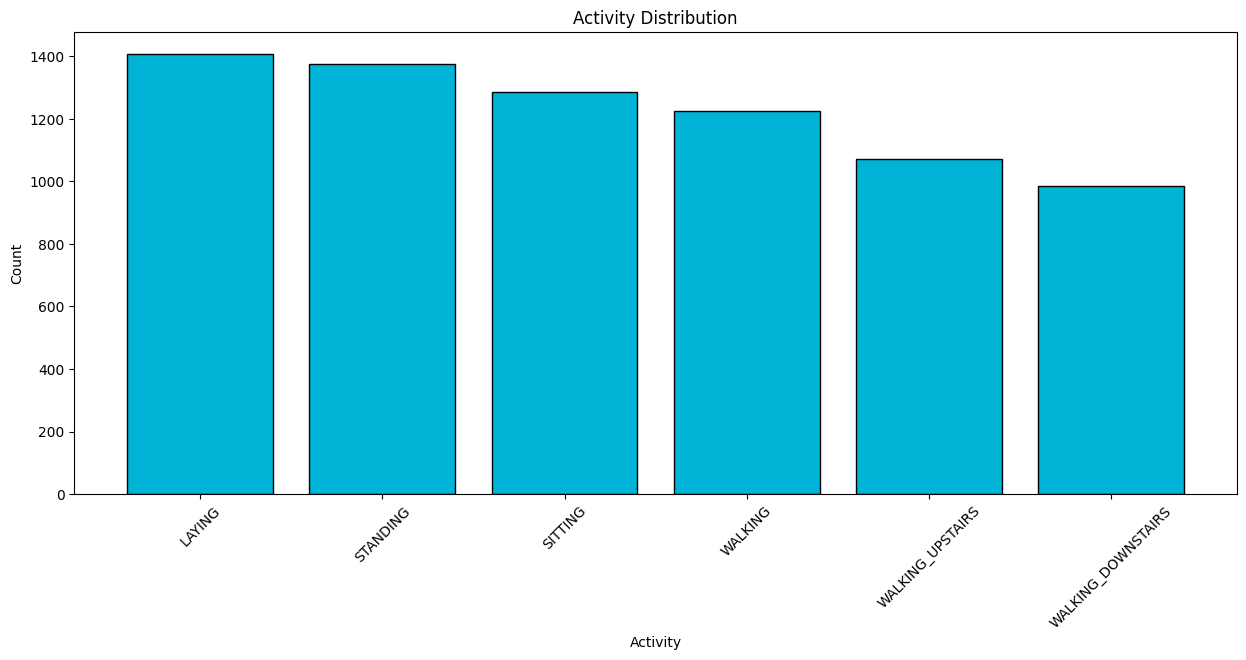

In [9]:
# checking imbalance in the dataset.
activity_counts = train['Activity'].value_counts()
plt.figure(figsize=(15,6))
plt.bar(activity_counts.index, activity_counts.values,color='#00b4d8',edgecolor='black')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Activity Distribution')
plt.xticks(rotation=45)
plt.show()

There is almost same number of instances for each acitivity. So, It is not a class imbalance problem. If this was a problem then you use a technique of downsambling or upweighting.

## Exploratory Data Analysis

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient='index').rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAccJerk,79
fBodyGyro,79
fBodyAcc,79
tBodyAcc,40
tBodyGyro,40
tBodyAccJerk,40
tGravityAcc,40
tBodyGyroJerk,40
tBodyAccJerkMag,13
tGravityAccMag,13


This tell us how many values a one parameter is holding. for example. tBodyAcc is main one paramter but it split into 40 subparamater like tBodyAcc-mean-X/Y/Z,tBosyAcc-std-X/Y/Z etc.

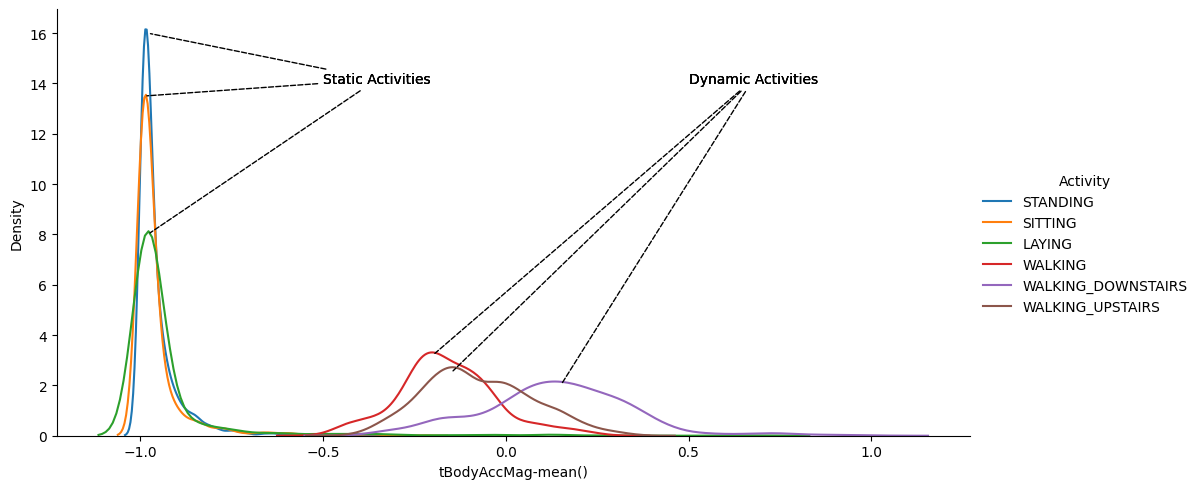

In [12]:
#Analyze how acelerometer strongly related to Body feature
facitgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=2)
facitgrid.map(sns.kdeplot,'tBodyAccMag-mean()').add_legend()
plt.annotate("Static Activities",xy=(-.98,8),xytext=(-0.5,14),arrowprops={'arrowstyle': '-' ,'ls': 'dashed'})
plt.annotate("Static Activities",xy=(-.99,13.5),xytext=(-0.5,14),arrowprops={'arrowstyle': '-' ,'ls': 'dashed'})
plt.annotate("Static Activities",xy=(-.98,16),xytext=(-0.5,14),arrowprops={'arrowstyle': '-' ,'ls': 'dashed'})

plt.annotate("Dynamic Activities",xy=(-0.2,3.2),xytext=(0.5,14),arrowprops={'arrowstyle': '-' ,'ls': 'dashed'})
plt.annotate("Dynamic Activities",xy=(-0.15,2.5),xytext=(0.5,14),arrowprops={'arrowstyle': '-' ,'ls': 'dashed'})
plt.annotate("Dynamic Activities",xy=(0.15,2),xytext=(0.5,14),arrowprops={'arrowstyle': '-' ,'ls': 'dashed'})

plt.show()

It shows that static activities are highly consistent, while dynamic ones involve varied acceleration patterns.

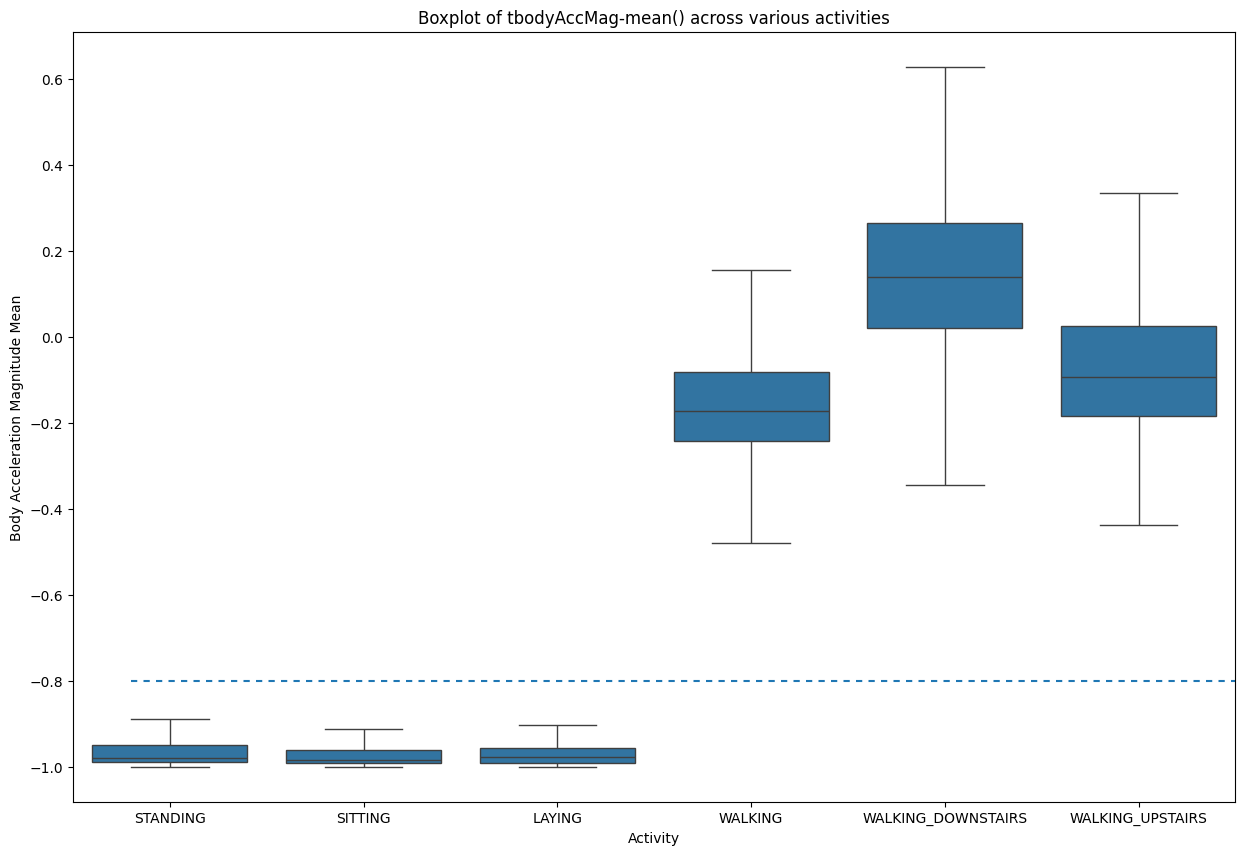

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train,x='Activity',y='tBodyAccMag-mean()',showfliers=False)
plt.ylabel('Body Acceleration Magnitude Mean')
plt.title('Boxplot of tbodyAccMag-mean() across various activities')
plt.axhline(y=-0.8,xmin=0.05,dashes=(3,3))
plt.show()

Any value less than -0.8 magnitude is a part of static Activity and other as a dynamic acitivity.Standing,Sitting, and Laying activities hows very low mean acceraleration magnitude. This makes sense beacuse these are static(low-motion activities).But others activities i.e walking, walking_downstairs, walking upstairs involves movement and greater bosy acceleration.

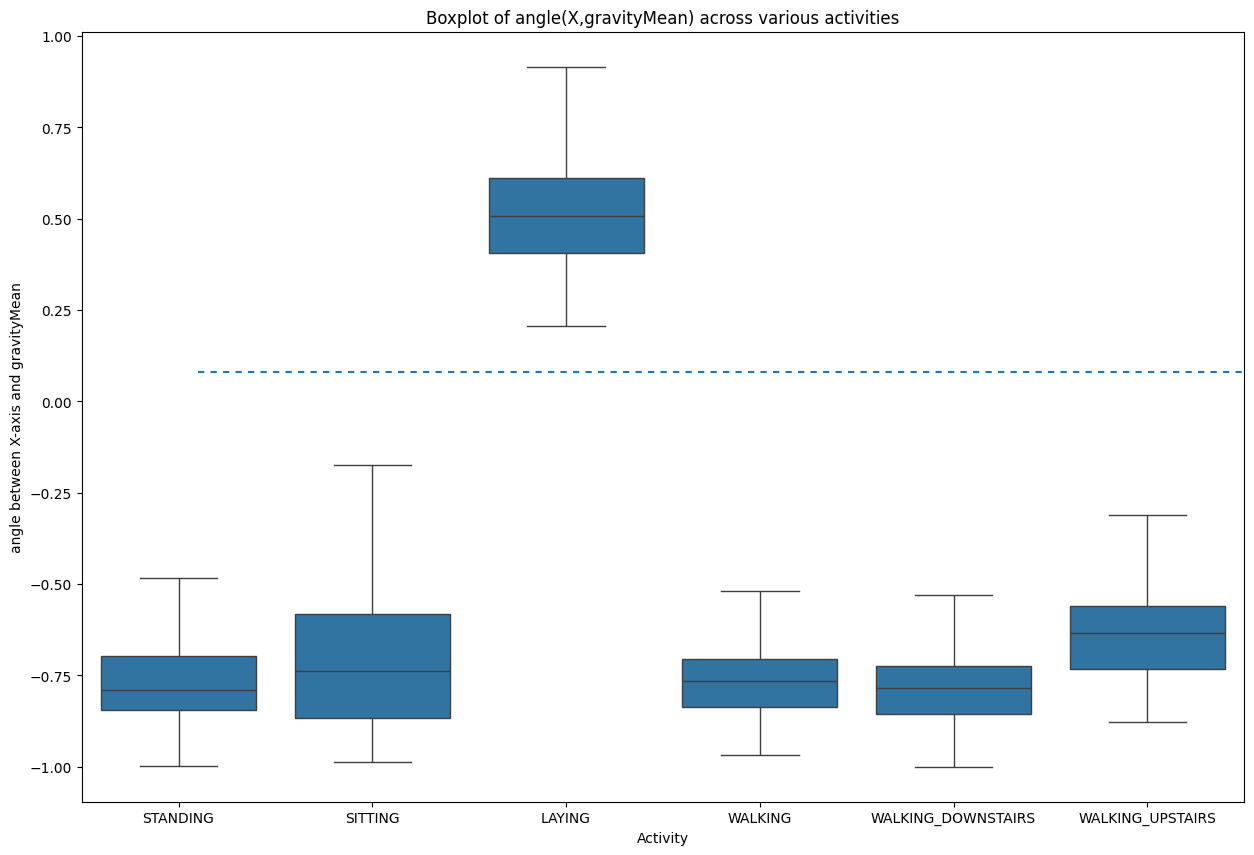

In [14]:
# Analysis Angle between X-axis and gravityMean feature
plt.figure(figsize=(15,10))
sns.boxplot(data=train,x='Activity',y='angle(X,gravityMean)',showfliers=False)
plt.ylabel('angle between X-axis and gravityMean')
plt.title('Boxplot of angle(X,gravityMean) across various activities')
plt.axhline(y=0.08,xmin=0.1,dashes=(3,3))
plt.show()


It helps in understanding the postural orientation of a person during an activity.

Higher values (closer to +1) indicate a horizontal posture (e.g., laying), while lower values (closer to -1) indicate a more vertical or upright posture.

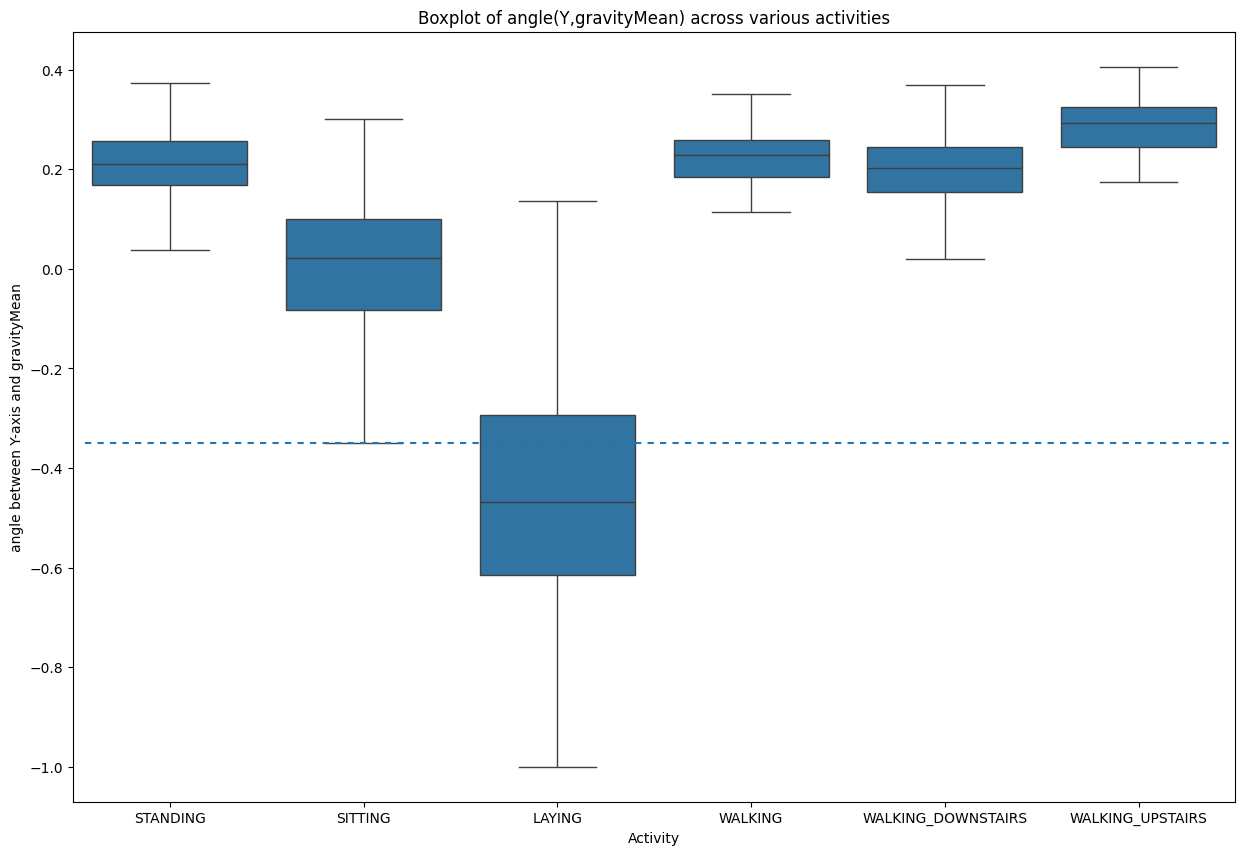

In [15]:
# Analysis Angle between Y-axis and gravityMean feature
plt.figure(figsize=(15,10))
sns.boxplot(data=train,x='Activity',y='angle(Y,gravityMean)',showfliers=False)
plt.ylabel('angle between Y-axis and gravityMean')
plt.title('Boxplot of angle(Y,gravityMean) across various activities')
plt.axhline(y=-.35,xmin=0.01,dashes=(3,3))
plt.show()

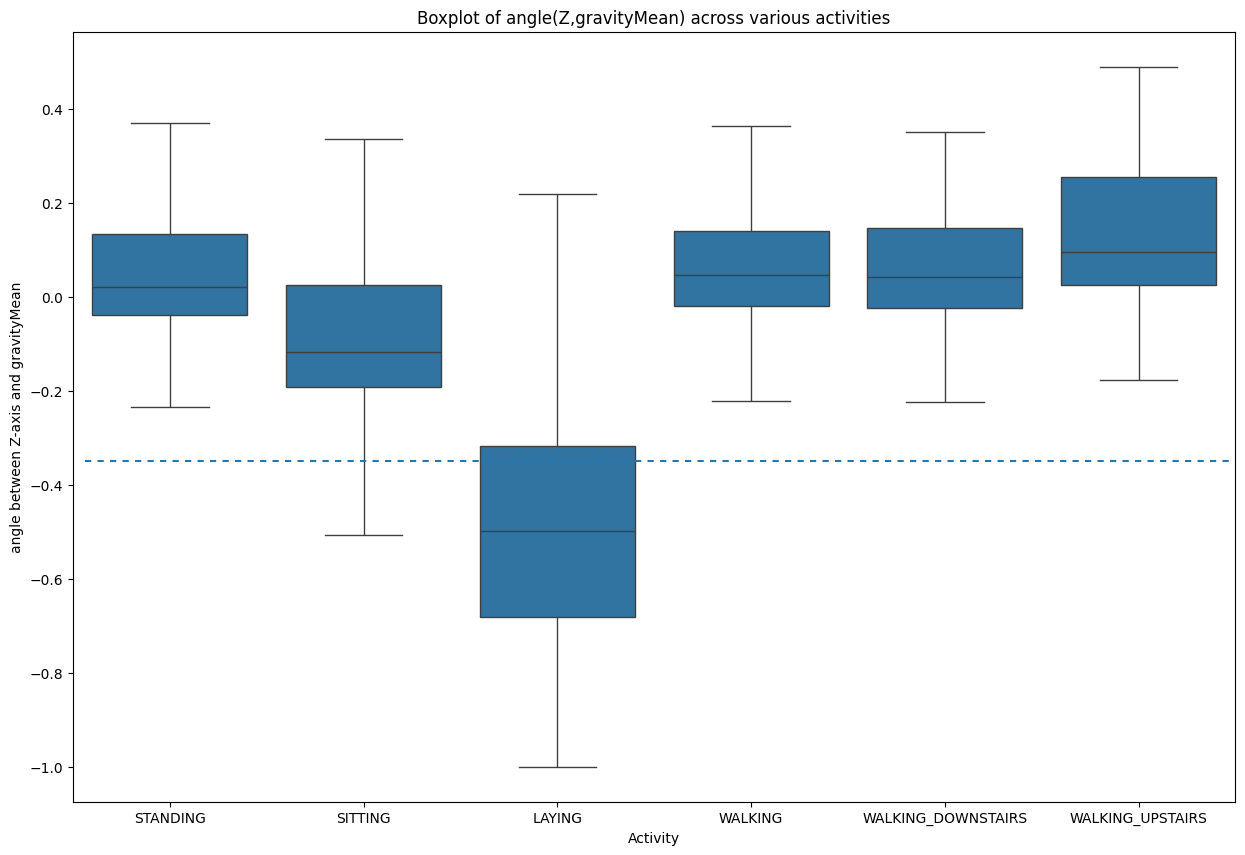

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train,x='Activity',y='angle(Z,gravityMean)',showfliers=False)
plt.ylabel('angle between Z-axis and gravityMean')
plt.title('Boxplot of angle(Z,gravityMean) across various activities')
plt.axhline(y=-.35,xmin=0.01,dashes=(3,3))
plt.show()

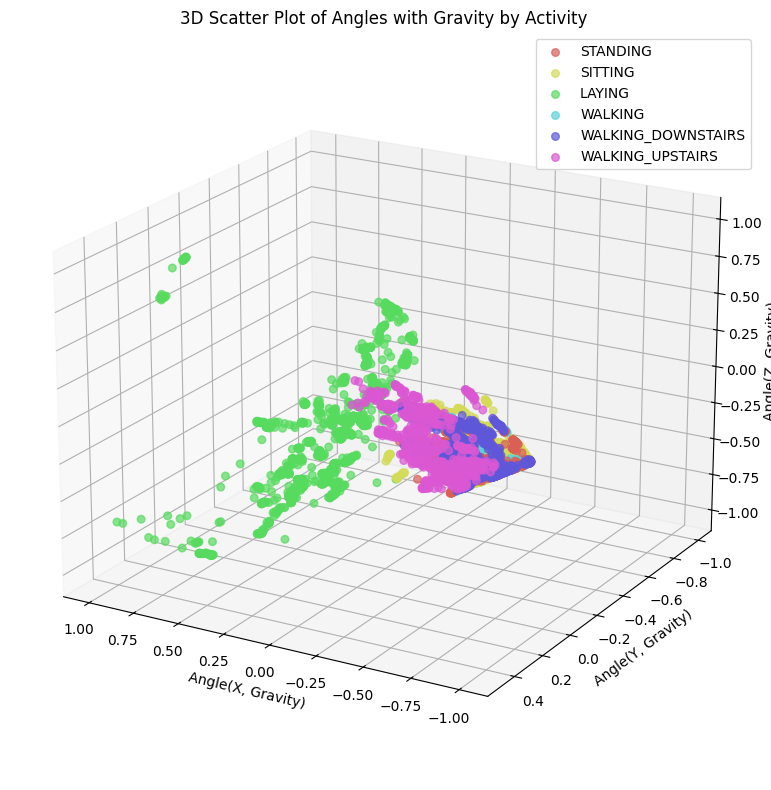

In [17]:
# 3-D scatter plot of combination of X,Y,Z
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Unique activities for color mapping
activities = train['Activity'].unique()
colors = sns.color_palette('hls', len(activities))
activity_color_map = dict(zip(activities, colors))

# Scatter each activity separately for better color legend
for activity in activities:
    subset = train[train['Activity'] == activity]
    ax.scatter(
        subset['angle(X,gravityMean)'],
        subset['angle(Y,gravityMean)'],
        subset['angle(Z,gravityMean)'],
        label=activity,
        color=activity_color_map[activity],
        s=30,
        alpha=0.7
    )

# Labels and aesthetics
ax.set_xlabel('Angle(X, Gravity)')
ax.set_ylabel('Angle(Y, Gravity)')
ax.set_zlabel('Angle(Z, Gravity)')
ax.set_title('3D Scatter Plot of Angles with Gravity by Activity')
ax.view_init(elev=20, azim=120)
ax.legend()
plt.tight_layout()
plt.show()

It is clearly separating a laying activity with other activity.

In [18]:
# Reduce high dimensional space to low dimensional space using pca and visulaize the graph.
from sklearn.decomposition import PCA
X_PCA=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=42).fit_transform(X_PCA)

In [19]:
pca

array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]], shape=(7352, 2))

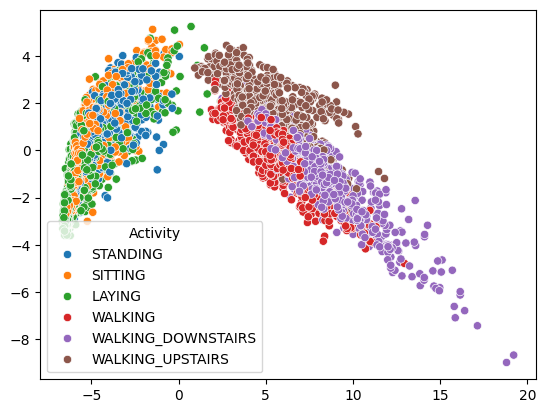

In [20]:
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])
plt.show()

here, you can clearly see a cluster of static activities and dynamic activites. So, most of the variable are related.

In [21]:
# Analysis using t-SNE-unsupervised non-linear dimensionality reduction technique for data exploratory and visulizing high-dimensional data
import plotly.express as px
from sklearn.manifold import TSNE
import nbformat

X_tsne = train.drop(['subject','Activity'], axis=1)
tsne_result = TSNE(n_components=2, random_state=42).fit_transform(X_tsne)

# Create DataFrame with t-SNE results
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE-1', 'TSNE-2'])
df_tsne['Activity'] = train['Activity']

# Use Plotly Express to plot
fig = px.scatter(df_tsne, x='TSNE-1', y='TSNE-2', color='Activity')
fig.show()

Above graph clearly distinguise laying activity from other as laying is horizontal while all other activities are performed vertically.

## Training a Model

In [22]:
X_train=train.drop(['subject','Activity'],axis=1)
y_train=train.Activity

X_test=test.drop(['subject','Activity'],axis=1)
y_test=test.Activity

In [23]:
print('Training data size: ',X_train.shape)
print('Test data size: ',X_test.shape)

Training data size:  (7352, 561)
Test data size:  (2947, 561)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Store metrics in a list of dictionaries
metrics_list = []

for name, model in models.items():
    print(f"\nTraining model: {name}")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the table
print("\nModel Evaluation Summary:")
print(metrics_df.sort_values(by='F1-Score', ascending=False))


Training model: Logistic Regression

Training model: Support Vector Machine

Training model: Decision Tree

Training model: Random Forest

Training model: AdaBoost

Model Evaluation Summary:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.960638   0.961979  0.960638  0.960495
1  Support Vector Machine  0.950458   0.951286  0.950458  0.950376
3           Random Forest  0.925008   0.926728  0.925008  0.924765
2           Decision Tree  0.861215   0.861672  0.861215  0.860878
4                AdaBoost  0.349169   0.154783  0.349169  0.212841


d:\Programming Practice\Applied Data Science\project-HumanActivityRecognition\human\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Hyperparamter tuning a best performing model

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [26]:
log_reg=LogisticRegression(max_iter=1000)
log_params={
    'C':[0.01,0.1,1,10,100],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga']
}

grid_Log=GridSearchCV(log_reg,log_params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_Log.fit(X_train,y_train)
print("Best Params (logReg): ",grid_Log.best_params_)
print("Best Score (Train CV): ",grid_Log.best_score_)

# evaluating on test case
y_pred_log=grid_Log.predict(X_test)
print("\nClassification Report: ")
print(classification_report(y_test,y_pred_log))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params (logReg):  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (Train CV):  0.9432869490420233

Classification Report: 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [27]:
svc = SVC()

svc_params = {
    'C': [0.1, 1, 10,50,100],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("Best Params (SVM):", grid_svc.best_params_)
print("Best Score (Train CV):", grid_svc.best_score_)

# Evaluate on test
y_pred_svc = grid_svc.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params (SVM): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score (Train CV): 0.9453280428418818

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.90      0.94       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.96       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.97      0.97      2947



In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipe=Pipeline([
    ('pca',PCA(n_components=90)),
    ('clf',LogisticRegression(max_iter=1000))
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.86      0.90       491
          STANDING       0.89      0.94      0.91       532
           WALKING       0.93      0.99      0.96       496
WALKING_DOWNSTAIRS       0.97      0.94      0.96       420
  WALKING_UPSTAIRS       0.95      0.92      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



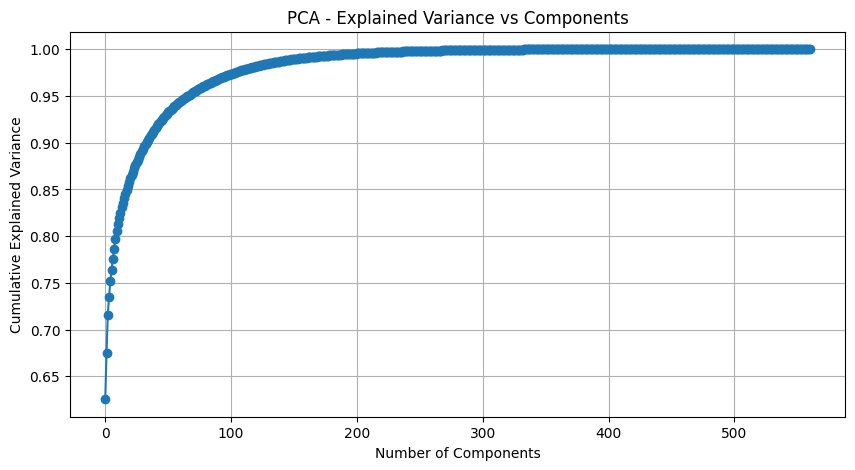

In [30]:
pca = PCA().fit(X_train)

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('PCA - Explained Variance vs Components')
plt.show()

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

In [32]:
selector = SelectKBest(score_func=f_classif, k=50)

# Build a pipeline: feature selection + model
pipeline = Pipeline([
    ('select', selector),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.64      0.73       491
          STANDING       0.73      0.88      0.80       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
  WALKING_UPSTAIRS       0.94      0.86      0.90       471

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947



In [33]:
from sklearn.feature_selection import RFE

In [34]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=50)

rfe.fit(X_train, y_train)

# Use reduced features for training
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.84      0.89       491
          STANDING       0.87      0.96      0.92       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.95      0.96       420
  WALKING_UPSTAIRS       0.95      0.93      0.94       471

          accuracy                           0.94      2947
         macro avg       0.95      0.94      0.94      2947
      weighted avg       0.95      0.94      0.94      2947

